<a href="https://colab.research.google.com/github/hws2002/Master-Python-with-Just-One-Book-ADP/blob/main/Chapter6/Chapter6_2_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd

cereal = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/cereal.csv")
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [83]:
# name, mfr, type  변수는 데이터 타입이 ojbect이므로 제외하고,
# 설탕함유량(sugars)가 0 이상인 데이터만 추출하는 코드를 추가하여, 설탕이 함유된  시리얼에 대한 분석을 수행한다.

cereal = cereal.drop(columns = ['name','mfr','type'])
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calories  77 non-null     int64  
 1   protein   77 non-null     int64  
 2   fat       77 non-null     int64  
 3   sodium    77 non-null     int64  
 4   fiber     77 non-null     float64
 5   carbo     77 non-null     float64
 6   sugars    77 non-null     int64  
 7   potass    77 non-null     int64  
 8   vitamins  77 non-null     int64  
 9   shelf     77 non-null     int64  
 10  weight    77 non-null     float64
 11  cups      77 non-null     float64
 12  rating    77 non-null     float64
dtypes: float64(5), int64(8)
memory usage: 7.9 KB


In [84]:
cereal = cereal[cereal['sugars'] >= 0]
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [85]:
cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,106.973684,2.513158,1.000000,161.776316,2.144737,14.802632,7.026316,95.894737,28.618421,2.223684,1.030000,0.823026,42.558301
std,19.597261,1.064499,1.006645,82.323362,2.398355,3.907326,4.378656,71.742238,22.250074,0.826215,0.151438,0.233604,14.108765
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,133.750000,0.750000,12.000000,3.000000,40.000000,25.000000,1.750000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,1.250000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.971798
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [86]:
cereal.isna().sum()

,0
calories,0
protein,0
fat,0
sodium,0
fiber,0
carbo,0
sugars,0
potass,0
vitamins,0
shelf,0


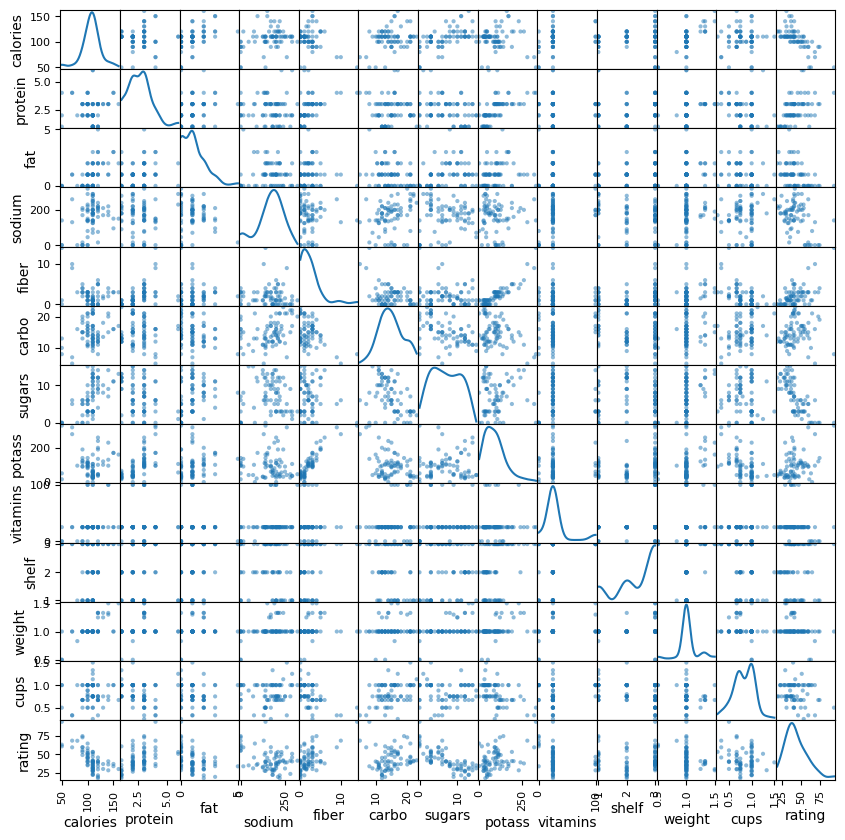

In [87]:
# 산점도 그리기 - scatter_matrix
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(cereal, alpha = 0.5, figsize = (10,10),diagonal = 'kde')
plt.show()

<ipython-input-88-343126e29fe8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cereal2.sort_values(by=['sugars'], inplace = True)


    sugars     rating
20       0  64.533816
54       0  60.756112
55       0  63.005645
   sugars     rating
0       0  64.533816
1       0  60.756112
2       0  63.005645


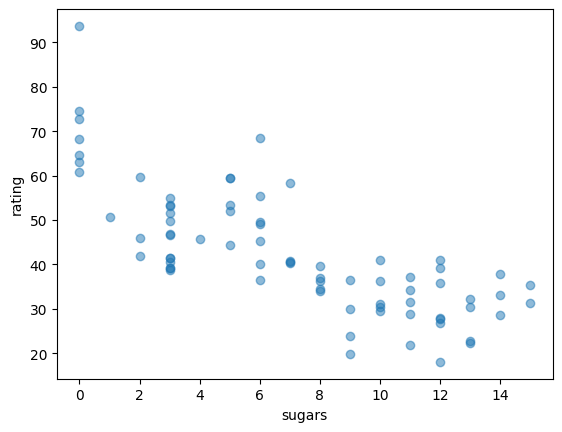

In [88]:
# 시리얼의 설탕 함유량에 따른 영양등급평가를 다항 회귀분석으로 그려보자
cereal2 = cereal[['sugars','rating']]

cereal2.sort_values(by=['sugars'], inplace = True)
print(cereal2.head(3))
cereal2.reset_index(drop=True, inplace = True)
print(cereal2.head(3))
x = cereal2['sugars'].values
y = cereal2['rating'].values

plt.scatter(x,y,alpha = .5)
plt.xlabel('sugars')
plt.ylabel('rating')
plt.show()

In [89]:
# 데이터 분할
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
X_train

(53,) (23,)
(53,) (23,)


array([11,  6, 10,  6, 12,  7,  3, 13,  0, 11,  9, 12,  8,  4,  2,  3,  0,
       13,  9,  1, 14, 10,  3,  3,  6,  6,  9,  8, 10,  3,  0, 12,  3,  5,
        5,  8,  3, 13,  3, 15, 12,  3, 10,  5,  0,  0,  3, 12,  0,  2, 14,
        3,  7])

In [90]:
# PolynomialFeatures로 2차 다항식 조건을 생성하자
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2, include_bias = True)
X_poly = poly_reg.fit_transform(X_train.reshape(-1,1))


In [91]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [92]:
X_test_poly = poly_reg.transform(X_test.reshape(-1,1))
pred = reg.predict(X_test_poly)
print(X_test_poly.shape)
print(pred.shape)
print(np.concatenate((pred.reshape(-1,1), y_test.reshape(-1,1)),1))

(23, 3)
(23,)
[[51.63225287 46.658844  ]
 [32.10406283 28.742414  ]
 [55.79061653 59.642837  ]
 [31.07790457 37.840594  ]
 [32.10406283 31.435973  ]
 [44.46041881 44.330856  ]
 [38.81510912 40.400208  ]
 [41.44694842 55.333142  ]
 [41.44694842 49.120253  ]
 [31.38037899 27.753301  ]
 [36.56490091 34.384843  ]
 [34.6963238  29.924285  ]
 [65.25223713 63.005645  ]
 [33.20937777 31.072217  ]
 [44.46041881 52.076897  ]
 [38.81510912 40.448772  ]
 [51.63225287 53.131324  ]
 [36.56490091 33.983679  ]
 [41.44694842 49.511874  ]
 [31.03832623 22.736446  ]
 [31.38037899 39.259197  ]
 [31.499114   31.230054  ]
 [32.10406283 21.871292  ]]


In [93]:
# 성능 평가 지표를 사용해 모델의 예측력 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
r2_score1 = r2_score(y_test, pred)
print(r2_score1)
r2_score2 = reg.score(X_test_poly, y_test)
print(r2_score2)
print("MAE \t{}".format(round(mae,3)))
print("MSE \t{}".format(round(mse,3)))
print("R2 \t{}%".format(round(r2_score1*100,3)))

0.7437569749767221
0.7437569749767221
MAE 	4.606
MSE 	33.565
R2 	74.376%


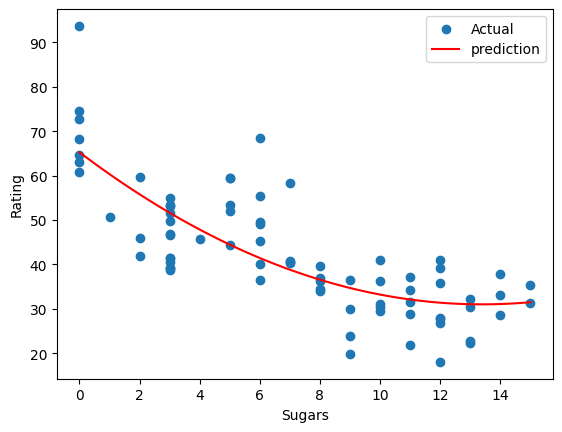

In [94]:
# 시각화해서 확인해보자
X_new = np.linspace(0,15,100).reshape(100,1)

X_new_poly = poly_reg.transform(X_new)
y_hat = reg.predict(X_new_poly)

plt.scatter(x,y, label = 'Actual')
plt.plot(X_new,y_hat, 'r-', label = 'prediction')
plt.xlabel('Sugars')
plt.ylabel('Rating')
plt.legend(loc = 'upper right')
plt.show()

In [95]:
# 고차 다항 회귀 분석
X = cereal.iloc[:,:-1].values
y = cereal.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


In [96]:
# 표준정규화후
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [97]:
# 다항 변수 변환과 모델 적합 과정을 수행하자
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

from sklearn.linear_model import LinearRegression
X_poly = poly_reg.fit_transform(X_train_sc)
model = LinearRegression()
model.fit(X_poly, y_train)



LinearRegression()

In [98]:
X_test_poly = poly_reg.transform(X_test_sc)

pred = model.predict(X_test_poly)

print("MAE \t{}".format(round(mean_absolute_error(y_test,pred),3)))
print('RMSE \t{}'.format(round(np.sqrt(mean_squared_error(y_test,pred)),3)))
print("ACC \t{}".format(round(r2_score(y_test,pred)*100,3)))

MAE 	2.197
RMSE 	3.136
ACC 	92.458
